<a href="https://colab.research.google.com/github/UgurUysal86/My-ML-Notebooks/blob/main/regression/ex-2/20240809_Training_a_regression_model_on_the_Auto_MPG_dataset_to_predict_fuel_efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Ugur Uysal](https://github.com/UgurUysal86) - ugur.uysal.86@gmail.com - 09. AUG 2024
## Training a regression model on the Auto MPG dataset to predict fuel efficiency

* This notebook demonstrates the process of training a neural network-based regression model utilizing tensorflow.keras on the Auto MPG dataset to predict fuel efficiency.

* Portions of this notebook are modifications based on work created and shared by Google (https://www.tensorflow.org/tutorials/keras/regression) and code samples are used according the Apache 2.0 License.


## 1. Imports and settings
The code below sets up libraries for TensorFlow, visualization, and data manipulation in Python. It’s a common starting point for machine learning and data science projects.

In [ ]:
import tensorflow as tf
print("Using Tensorflow Version", tf.__version__, "\n")
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=3, suppress=True)
import pandas as pd

Using Tensorflow Version 2.17.0 



## 2. Loading and exploring the dataset

The code below loads a the auto-mpg dataset from a URL, clean it by removing missing values, map numeric country codes to country names, and perform one-hot encoding for further analysis. Specifically, it prepares the data for machine learning or statistical tasks related to automotive attributes.

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight','Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = dataset.dropna()
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset = dataset.replace({True: 1, False: 0})
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


## 3. Analysing the Dataset
The given dataset contains information about various car features, including MPG (fuel efficiency), cylinders, displacement, horsepower, weight, acceleration, model year, and binary indicators for the car’s origin (Europe, Japan, and USA)

The following code defines a function called analysis that takes a Pandas DataFrame as an input and prints out various summary statistics about the data. The function prints the data types of each column, the number of rows and columns, the index range, the column names, the number of null values in each column, the mean value of each column, and the standard deviation of each column.

In [ ]:
# Analysis of the dataset
def analysis(df):
    print("Data Types:")
    print(df.dtypes)
    print("\nNumber of Rows and Columns:")
    print(df.shape)
    print("\nColumn Names:")
    print(df.columns)
    print("\nNumber of Null Values:")
    print(df.isnull().sum())
    print("\nMean Value:")
    print(df.mean())
    print("\nStd Deviation:")
    print(df.std())
analysis(dataset)

Data Types:
MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Europe            int64
Japan             int64
USA               int64
dtype: object

Number of Rows and Columns:
(392, 10)

Column Names:
Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Europe', 'Japan', 'USA'],
      dtype='object')

Number of Null Values:
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Europe          0
Japan           0
USA             0
dtype: int64

Mean Value:
MPG               23.445918
Cylinders          5.471939
Displacement     194.411990
Horsepower       104.469388
Weight          2977.584184
Acceleration      15.541327
Model Year        75.979592
Europe             0.173469
Japan              0.201531
USA                0.625000
dtype: float64

S

## Correlation matrix
The code below computes the correlation matrix of the dataset regarding the features 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight','Acceleration', 'Model Year', and 'Origin'. Here is an interpretation of the correlation matrix for all the features:

* MPG (Miles Per Gallon):
MPG has a strong negative correlation with “Cylinders” (-0.78), “Displacement” (-0.81), “Horsepower” (-0.78), and “Weight” (-0.83).
This means that as the number of cylinders, engine displacement, horsepower, or weight increases, MPG tends to decrease.

* Cylinders have a strong positive correlation with “Displacement” (0.95) and “Horsepower” (0.84).
More cylinders typically correspond to larger engine displacement and higher horsepower.

* Displacement has a strong positive correlation with “Cylinders” (0.95) and “Horsepower” (0.90).
Larger engine displacement usually leads to higher horsepower.

* Horsepower has a strong positive correlation with “Cylinders” (0.84) and “Displacement” (0.90).
Higher horsepower engines tend to have more cylinders and larger displacement.

* Weight has a strong negative correlation with “MPG” (-0.83).
Heavier cars generally have lower fuel efficiency (MPG).

* Acceleration has a moderate positive correlation with “MPG” (0.42) and a weak negative correlation with “Weight” (-0.42). Faster acceleration is associated with better MPG, while heavier cars tend to accelerate more slowly.

* Model Year:
Model Year has a positive correlation with “MPG” (0.58).
Newer model years tend to have better fuel efficiency.

* Europe, Japan, and USA:
These binary variables represent the car’s origin (Europe, Japan, or USA).
“Europe” has a positive correlation with “MPG” (0.24), while “USA” has a negative correlation (-0.57). Cars from Europe tend to have better MPG, while those from the USA have lower MPG.

In [ ]:
corrMatrix = dataset.corr()
corrMatrix.style.background_gradient(cmap='coolwarm')

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
MPG,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.244313,0.451454,-0.565161
Cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.352324,-0.404209,0.610494
Displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.371633,-0.440825,0.655936
Horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.284948,-0.321936,0.489625
Weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.293841,-0.447929,0.600978
Acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.208298,0.115020,-0.258224
Model Year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,-0.037745,0.199841,-0.136065
Europe,0.244313,-0.352324,-0.371633,-0.284948,-0.293841,0.208298,-0.037745,1.000000,-0.230157,-0.591434
Japan,0.451454,-0.404209,-0.440825,-0.321936,-0.447929,0.115020,0.199841,-0.230157,1.000000,-0.648583
USA,-0.565161,0.610494,0.655936,0.489625,0.600978,-0.258224,-0.136065,-0.591434,-0.648583,1.000000


Based on the correlation matrix above, the features with high correlations to MPG (Cylinders, Displacement, Horsepower, and Weight) should be kept in the dataset. Features with weak correlations to MPG (Acceleration, Model Year, Origin=Europe/Japan/USA) could be droped from the dataset with the code below. In this case we decide to keep all columns. Use this code to drop Columns if needed:
* dataset = dataset.drop(columns=['Acceleration', 'Model Year', 'Europe', 'Japan', 'USA'], axis=1)


## 4. Spliting the data into training and test sets

The code below splits the dataset into training and test subsets for machine learning tasks:

Data Splitting:
train_data contains 80% of the original dataset, randomly sampled.
test_data includes the remaining 20% by excluding the rows present in train_data.
Feature and Label Separation:
train_x and test_x are copies of the features (input variables) from the training and test data, respectively.
train_y and test_y store the corresponding labels (target variable, in this case, ‘MPG’).

In [ ]:
train_data = dataset.sample(frac=0.8, random_state=0)
test_data = dataset.drop(train_data.index)

print("train_data shape:", train_data.shape)
print("test_data shape:" , test_data.shape)

train_x = train_data.copy()
test_x = test_data.copy()

train_y = train_x.pop('MPG')
test_y = test_x.pop('MPG')

print('\n' + "features sample:"+ '\n', train_x.iloc[313])
print('\n' + "Label sample:", train_y[313])

train_data shape: (314, 10)
test_data shape: (78, 10)

features sample:
 Cylinders          4.0
Displacement     107.0
Horsepower        86.0
Weight          2464.0
Acceleration      15.5
Model Year        76.0
Europe             1.0
Japan              0.0
USA                0.0
Name: 182, dtype: float64

Label sample: 28.0


## 4. Feature-wise normalization of the data (substract mean of feature and divide by std deviation)

The purpose of the code below is to normalize the features in the training and test datasets:

mean = train_x.mean(axis=0): Calculates the mean (average) of each feature along the rows (axis 0) in the training data.
train_x -= mean: Subtracts the mean from each feature in the training data, centering the distribution around zero.
std = train_x.std(axis=0): Computes the standard deviation of each feature in the training data.
train_x /= std: Divides each feature by its standard deviation, scaling the features to have unit variance.
The same normalization process is then applied to the test data (test_x). Finally, the code prints the shapes of the normalized training and test data, along with a sample feature row from the training data and its corresponding label.

In [ ]:
mean = train_x.mean(axis=0)
train_x -= mean
std = train_x.std(axis=0)
train_x /= std

test_x -= mean
test_x /= std

print("train_data shape:", train_x.shape)
print("test_data shape:", test_x.shape)
print('\n' + "features sample:" + '\n', train_x.iloc[313])
print('\n' + "Label sample:", train_y[313])

train_data shape: (314, 9)
test_data shape: (78, 9)

features sample:
 Cylinders      -0.869348
Displacement   -0.846517
Horsepower     -0.495310
Weight         -0.623596
Acceleration   -0.021237
Model Year      0.027726
Europe          2.143005
Japan          -0.495225
USA            -1.286751
Name: 182, dtype: float64

Label sample: 28.0


In [ ]:
# reversing the normalizing of the input x for testing purpose.
# After the model was trained on normalized data it will expect normalized input, based on the calculated mean and std of the training set for inference.
# Since we are predicting only a singe y value, we do not need to normalize the output y (MPG in this case).

reversed = train_x.iloc[313]
reversed *= std
reversed += mean
print(reversed)

Cylinders          4.0
Displacement     107.0
Horsepower        86.0
Weight          2464.0
Acceleration      15.5
Model Year        76.0
Europe             1.0
Japan              0.0
USA                0.0
Name: 182, dtype: float64


## 5. Building the model

The code below creates a Sequential neural network model using Keras (a high-level neural networks API) with the following characteristics:

Model Architecture:
The model consists of three layers:
The first layer is a Dense layer with 64 units and a ReLU activation function.
The second layer is another Dense layer with 64 units and a ReLU activation function.
The third layer is a Dense layer with a single output unit (for regression tasks).
The input shape for the first layer is determined by the number of features in the training data (train_x.shape[1]).
Compilation:
The model is compiled using the RMSprop optimizer with a learning rate of 0.0001.
The loss function used during training is the mean squared error (MSE).
The model’s performance is evaluated using the mean absolute error (MAE) metric.
Summary:
The model.summary() call displays a summary of the model architecture, including the layer types, output shapes, and trainable parameters.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

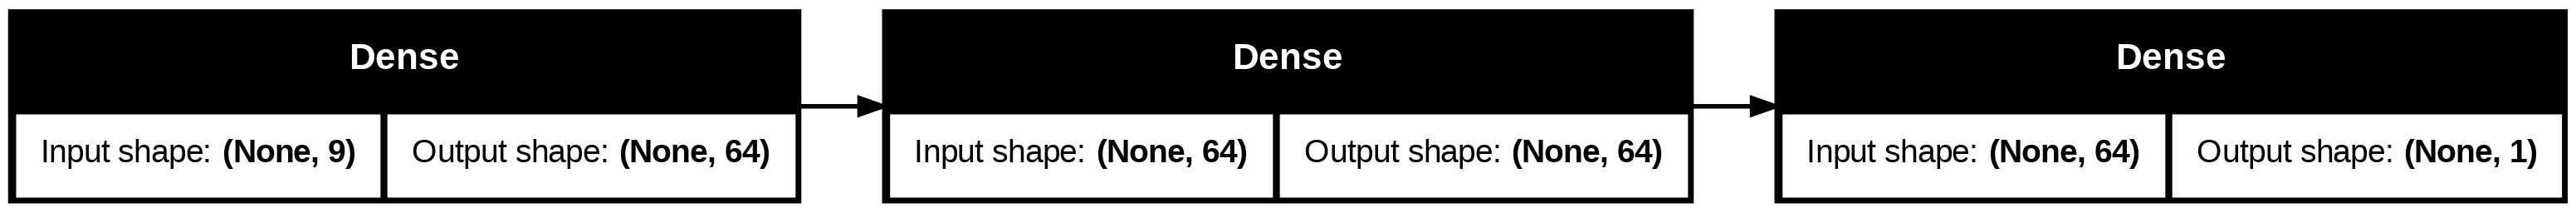

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(train_x.shape[1],))) # train_x.shape[1] == 9 since train_x.shape == (314, 9)
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1))


model.compile(optimizer=tf.keras.optimizers.RMSprop(0.0001), loss=tf.keras.losses.MeanSquaredError, metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.summary()

#plotting the model
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

## 6. Training the model

The purpose of the provided code is to train a neural network model (model) using the training features (train_x) and corresponding labels (train_y). Here are the key steps:

Training Configuration:
EPOCHS = 1000: Specifies the maximum number of training epochs (iterations).
early_stop: Sets up early stopping based on validation loss. If the validation loss doesn’t improve for a certain number of epochs (patience), training stops early.
Model Training:
model.fit(...): Trains the model using the training data (train_x, train_y).
It monitors the validation loss during training and stops early if necessary.
The batch size is set to 16, and progress updates are displayed (verbose=2)

In [ ]:
EPOCHS = 1000
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=50, verbose=1, mode='auto', baseline=None, restore_best_weights=True)
history = model.fit(train_x, train_y, epochs=EPOCHS, validation_split = 0.1, batch_size=16, verbose=2, callbacks=[early_stop])

Epoch 1/1000
18/18 - 2s - 115ms/step - loss: 585.3057 - mean_absolute_error: 23.0407 - val_loss: 587.9011 - val_mean_absolute_error: 22.8117
Epoch 2/1000
18/18 - 0s - 10ms/step - loss: 576.2576 - mean_absolute_error: 22.8599 - val_loss: 579.5042 - val_mean_absolute_error: 22.6451
Epoch 3/1000
18/18 - 0s - 10ms/step - loss: 568.2551 - mean_absolute_error: 22.6995 - val_loss: 571.2296 - val_mean_absolute_error: 22.4796
Epoch 4/1000
18/18 - 0s - 9ms/step - loss: 560.2045 - mean_absolute_error: 22.5375 - val_loss: 562.9306 - val_mean_absolute_error: 22.3135
Epoch 5/1000
18/18 - 0s - 23ms/step - loss: 552.0996 - mean_absolute_error: 22.3729 - val_loss: 554.6207 - val_mean_absolute_error: 22.1457
Epoch 6/1000
18/18 - 1s - 35ms/step - loss: 543.8598 - mean_absolute_error: 22.2054 - val_loss: 545.9838 - val_mean_absolute_error: 21.9701
Epoch 7/1000
18/18 - 1s - 33ms/step - loss: 535.5434 - mean_absolute_error: 22.0341 - val_loss: 537.5416 - val_mean_absolute_error: 21.7959
Epoch 8/1000
18/18 -

## 7. Printing training results

This code organizes and extracts relevant information from the training history.

In [ ]:
history_dict = history.history
hist = pd.DataFrame(history_dict)
trained_epochs = len(history.epoch)+1
print(hist)
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
mae_values = history_dict['mean_absolute_error']
val_mae_values = history_dict['val_mean_absolute_error']

           loss  mean_absolute_error    val_loss  val_mean_absolute_error
0    585.305664            23.040743  587.901123                22.811737
1    576.257629            22.859947  579.504211                22.645065
2    568.255127            22.699512  571.229614                22.479607
3    560.204468            22.537487  562.930603                22.313488
4    552.099609            22.372885  554.620728                22.145746
..          ...                  ...         ...                      ...
359    6.748264             1.856963    8.623361                 2.313069
360    6.739315             1.857666    8.640614                 2.315247
361    6.728718             1.856016    8.704536                 2.321909
362    6.721940             1.855225    8.785114                 2.330763
363    6.732178             1.853065    8.712797                 2.323334

[364 rows x 4 columns]


## 8. Plotting training results (loss)

The code to create the plot below shows the training loss (loss_values) and validation loss (val_loss_values) over the training epochs:

The x-axis represents the number of epochs, and the y-axis represents the loss. The blue dots correspond to training loss, while the solid blue line represents validation loss. As training progresses, we aim to minimize both losses.

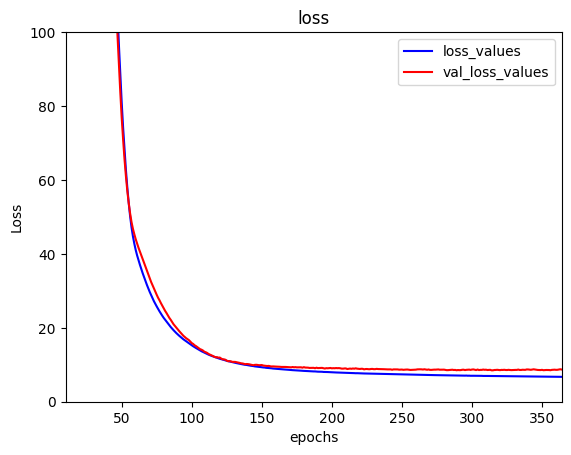

In [ ]:
plt.plot(range(1, trained_epochs), loss_values, color = 'blue', label='loss_values')
plt.plot(range(1, trained_epochs), val_loss_values, color = 'red', label='val_loss_values')
plt.title("loss")
plt.xlabel("epochs")
plt.xlim(10,len(loss_values))
plt.ylabel("Loss")
plt.ylim(0,100)
plt.legend()

## 9. Plotting training results (mean_absolute_error)

The code to create the plot below illustrates the mean absolute error (MAE) during training:

The x-axis represents the number of epochs.
The y-axis represents the MAE.
Blue dots correspond to training MAE, while the solid blue line represents validation MAE.

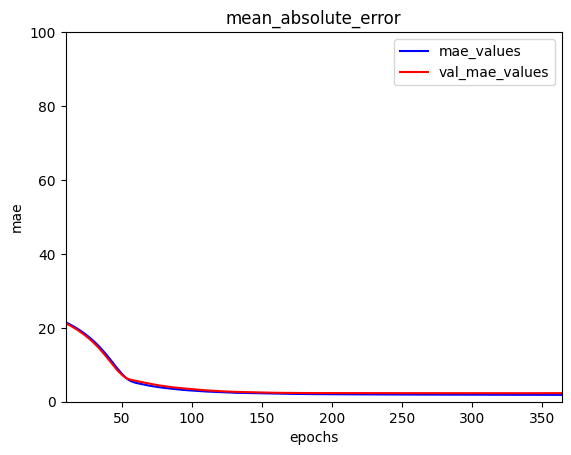

In [ ]:
plt.plot(range(1, trained_epochs), mae_values, color = 'blue', label='mae_values')
plt.plot(range(1, trained_epochs), val_mae_values, color = 'red', label='val_mae_values')
plt.title("mean_absolute_error")
plt.xlabel("epochs")
plt.xlim(10,len(mae_values))
plt.ylabel("mae")
plt.ylim(0,100)
plt.legend()

## 10. Testing the trained model

The code below calculates the mean absolute error (MAE) on the test set. This metric quantifies the average absolute difference between the predicted MPG values and the actual MPG values in the test data. Lower MAE values indicate better model performance.

In [ ]:
test_mse_score, test_mae_score = model.evaluate(test_x, test_y)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(test_mae_score))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.0734 - mean_absolute_error: 1.8126 
Testing set Mean Abs Error:  1.92 MPG


## 11. Printing test results and comparing them with the true MPG values

The code below predicts values using the trained model on the test features (test_x).

test_predictions = model.predict(test_x).flatten(): This line predicts the target variable (MPG) for the test data using the trained neural network model. The .flatten() method converts the predictions into a one-dimensional array.
result = pd.DataFrame(test_predictions, test_y): Creates a pandas DataFrame (result) with the predicted values (test_predictions) and the actual MPG values (test_y).
result.columns = ['pred']: Renames the column to ‘pred’ for clarity.
The resulting DataFrame contains predicted MPG values alongside the actual values.

In [ ]:
test_predictions = model.predict(test_x).flatten()
result = pd.DataFrame(test_predictions, test_y)
result.columns = ['pred']
print(result.to_string())

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
           pred
MPG            
15.0  15.518943
10.0  11.634832
9.0   13.054316
25.0  24.118158
19.0  21.604031
14.0  13.062443
14.0  13.747941
13.0  12.765511
18.0  18.911060
35.0  30.216328
25.0  25.441595
19.0  25.792221
13.0  14.597982
28.0  26.337620
13.0  12.730820
14.0  14.214166
15.0  14.722154
13.0  13.200396
18.0  18.418934
12.0  12.272525
16.0  12.832090
24.0  26.005747
19.0  20.358673
24.0  21.375732
31.0  29.897522
26.0  23.656422
16.0  15.054469
24.0  22.893847
18.0  16.005062
20.0  19.415043
29.0  28.229496
18.0  20.035013
19.0  18.019642
22.0  22.248150
26.0  26.856222
17.5  15.548905
22.5  19.078804
29.0  30.864672
29.0  30.478973
20.0  16.468006
32.0  31.115231
28.0  29.161131
13.0  16.227789
43.1  34.515289
36.1  35.640305
32.8  35.188934
20.5  20.655651
20.8  22.032669
18.1  20.208076
27.5  26.107454
30.9  31.319185
17.0  19.786938
29.5  31.961535
16.5  19.189629
15.5  18.611031
18.5  18.638390
31.9  33.897530
34.1  34.894928
19

## 12. Plotting test results (scatter plot - True MPG values vs. predicted MPG values)

The scatter plot below compares the true MPG values with the predicted MPG values from the trainined model:

The x-axis represents the true MPG values.
The y-axis represents the predicted MPG values.
The diagonal line indicates perfect predictions (where true and predicted values match).

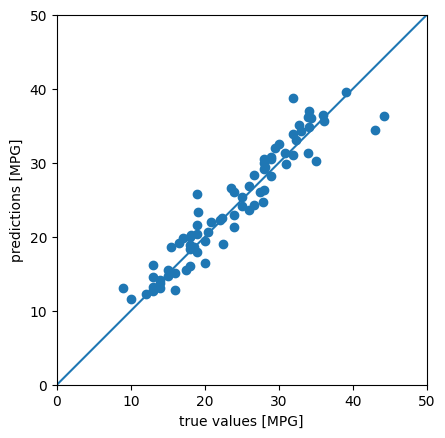

In [ ]:
plt.axes(aspect='equal')
plt.scatter(test_y, test_predictions)
plt.xlabel('true values [MPG]')
plt.ylabel('predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

## 13. Plotting test results (error plot)

The histogram below shows the distribution of prediction errors for the trained model:

The x-axis represents the prediction error (difference between predicted and true MPG values of the test set).
The y-axis represents the count of instances falling within each error bin.

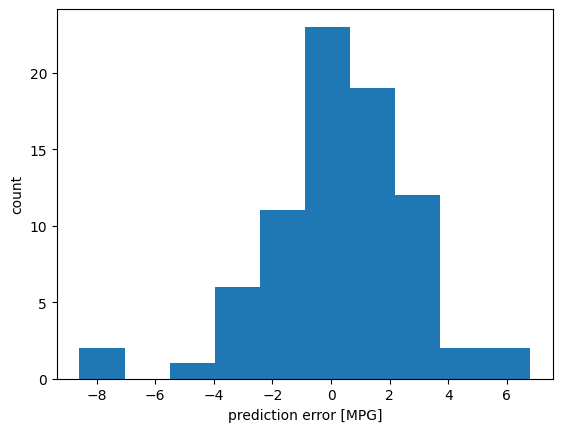

In [ ]:
error = test_predictions - test_y
plt.hist(error, bins = 10)
plt.xlabel("prediction error [MPG]")
_ = plt.ylabel("count")

## 14. calculating r2score and maep

The code below calculated evaluation metrics for the trained regression model:

R-squared (r²):
The r2_score function from sklearn.metrics calculates the coefficient of determination (R-squared) for regression models.
R-squared measures how well the model explains the variance in the target variable (test_y) based on the predictions (test_predictions).
The value of R-squared ranges from 0 to 1, where 1 indicates a perfect fit.
In this case, the R-squared value is approximately 0.90, which means that about 90% of the variance in the target variable is explained by the model.

Mean Absolute Error (MAE):
The mean_absolute_error function computes the average absolute difference between the predicted values and the true values (test_y).
MAE represents the average magnitude of errors in the predictions.
The MAE value is approximately 1.92, indicating that, on average, the predictions are off by around 1.92 MPG.

Mean Absolute Percentage Error (MAE Percentage):
The mean_absolute_percentage_error function calculates the percentage error between predicted and true values.

The MAE Percentage is approximately 8.5%, which means that, on average, the predictions deviate by 8.5% from the true values.

In [ ]:
from sklearn import metrics

r_squared = metrics.r2_score(test_y, test_predictions)
print("r²: ", r_squared)

mae = metrics.mean_absolute_error(test_y, test_predictions)
print("MAE: ", mae)

# https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
mae_p = metrics.mean_absolute_percentage_error(test_y, test_predictions) * 100
print("MAE Percentage: ", mae_p, "This indicates that the average absolute difference between the predicted values and the true value is", mae_p, "%.")

r²:  0.8987231977915396
MAE:  1.9205891560285517
MAE Percentage:  8.5214994903147 This indicates that the average absolute difference between the predicted values and the true value is 8.5214994903147 %.


## 15. Inference with the trained model to predict MPG for new custom Cars based on user input.
In this case we would like to create a very fuel efficient car. Therfore we choose fuel saving values for all x. This car is not part of the training or test set.  

In [ ]:
# Provide input x data ('Cylinders', 'Displacement', 'Horsepower', 'Weight','Acceleration', 'Model Year', 'Origin:Europe/Japan/USA') of new test vehicle here to predict the y value (MPG) with the trained model.

Cylinders = 4.0
Displacement = 60.0
Horsepower = 70.0
Weight = 1200.0
Acceleration = 20
Year = 90.0 # stand for 1990, the newer the higer the MPG
Europe = 1
Japan = 0
USA = 0

newData = np.array([Cylinders, Displacement, Horsepower, Weight, Acceleration, Year, Europe, Japan, USA])

# normalizing the new data - feature-wise normalization (substract mean of feature and divide by std deviation which was already calculated based on the training data)
newData-= mean
newData/= std

# Converts single inputs to a batch, since the model was trained on batch_size higher than 1.
newData = np.array([newData])

new_test_prediction = model.predict(newData)
MPG_pred = np.round(new_test_prediction[0],2)

print("predicted MPG", MPG_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
predicted MPG [53.16]


## 16.  Exercise

Try to find the optimal values for the input values x to generate a car with the highest MPG, but it should make sence, e.g. Weight = 0 would not make sence!

## References:
* TensorFlow: https://www.tensorflow.org/
* Tensorflow Basic regression: Predict fuel efficiency:https://www.tensorflow.org/tutorials/keras/regression
* Keras: https://keras.io/
* Chollet, F. (2018). Deep learning with Python. p. 85-91
* Quinlan,R.. (1993). Auto MPG. UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/9/auto+mpg
* scikit-learn: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

## License:
Copyright (c) 2024 Ugur Uysal

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

## Thank you. Visit my personal GitHub page https://github.com/UgurUysal86 for more examples.